In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

In [3]:
df_ls = pd.read_csv('listings.csv')
df_ls.head(5)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,958,https://www.airbnb.com/rooms/958,20190306152813,2019-03-06,"Bright, Modern Garden Unit - 1BR/1B",New update: the house next door is under const...,"Newly remodeled, modern, and bright garden uni...",New update: the house next door is under const...,none,*Quiet cul de sac in friendly neighborhood *St...,...,t,f,moderate,f,f,1,1,0,0,1.54
1,5858,https://www.airbnb.com/rooms/5858,20190306152813,2019-03-06,Creative Sanctuary,NaN,We live in a large Victorian house on a quiet ...,We live in a large Victorian house on a quiet ...,none,I love how our neighborhood feels quiet but is...,...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,0.93
2,7918,https://www.airbnb.com/rooms/7918,20190306152813,2019-03-06,A Friendly Room - UCSF/USF - San Francisco,Nice and good public transportation. 7 minute...,Room rental-sunny view room/sink/Wi Fi (inner ...,Nice and good public transportation. 7 minute...,none,"Shopping old town, restaurants, McDonald, Whol...",...,f,f,strict_14_with_grace_period,f,f,9,0,9,0,0.15
3,8142,https://www.airbnb.com/rooms/8142,20190306152813,2019-03-06,Friendly Room Apt. Style -UCSF/USF - San Franc...,Nice and good public transportation. 7 minute...,Room rental Sunny view Rm/Wi-Fi/TV/sink/large ...,Nice and good public transportation. 7 minute...,none,NaN,...,f,f,strict_14_with_grace_period,f,f,9,0,9,0,0.15
4,8339,https://www.airbnb.com/rooms/8339,20190306152813,2019-03-06,Historic Alamo Square Victorian,Pls email before booking. Interior featured i...,Please send us a quick message before booking ...,Pls email before booking. Interior featured i...,none,NaN,...,f,f,strict_14_with_grace_period,t,t,2,2,0,0,0.23


In [4]:
print(df_ls['bed_type'].value_counts())
print('\n')
print(df_ls['room_type'].value_counts())

Real Bed         7078
Futon              32
Pull-out Sofa      23
Airbed             11
Couch               7
Name: bed_type, dtype: int64


Entire home/apt    4366
Private room       2606
Shared room         179
Name: room_type, dtype: int64


In [5]:
df_ls = df_ls[['id', 'latitude', 'longitude', 'room_type', 'accommodates', 'guests_included', 'bedrooms', 'bathrooms', 'bed_type', 'review_scores_rating', 'price']]
df_ls['price'] = df_ls['price'].replace('[\$,)]','', regex=True).replace('[(]','-', regex=True).astype(float)

#df_ls['room_type'] = df_ls['room_type'].map({'Entire home/apt': 2, 'Private room': 1, 'Shared room' : 0})
df_ls['bed_type'] = df_ls['bed_type'].map({'Real Bed': 4, 'Futon': 3, 'Pull-out Sofa': 2, 'Airbed': 1, 'Couch': 0})

df_ls.fillna(0, inplace=True)
df_ls.head(5)

,id,latitude,longitude,room_type,accommodates,guests_included,bedrooms,bathrooms,bed_type,review_scores_rating,price
0,958,37.76931,-122.43386,Entire home/apt,3,2,1.0,1.0,4,97.0,170.0
1,5858,37.74511,-122.42102,Entire home/apt,5,2,2.0,1.0,4,98.0,235.0
2,7918,37.76669,-122.45250,Private room,2,1,1.0,4.0,4,85.0,65.0
3,8142,37.76487,-122.45183,Private room,2,1,1.0,4.0,4,93.0,65.0
4,8339,37.77525,-122.43637,Entire home/apt,5,2,2.0,1.5,4,97.0,785.0


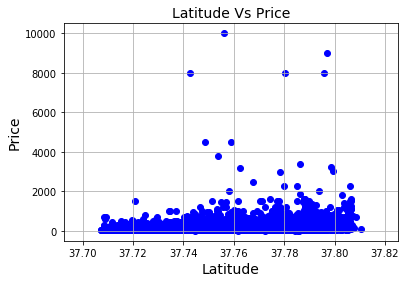

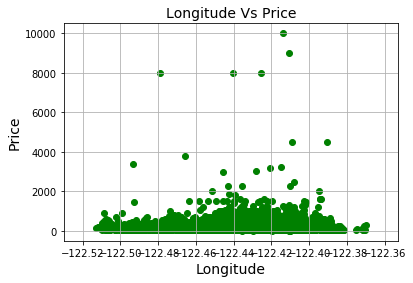

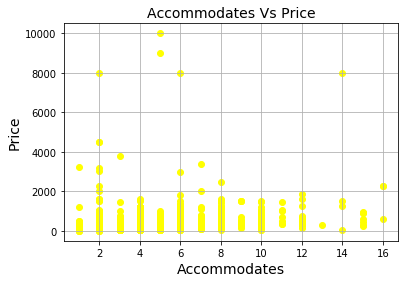

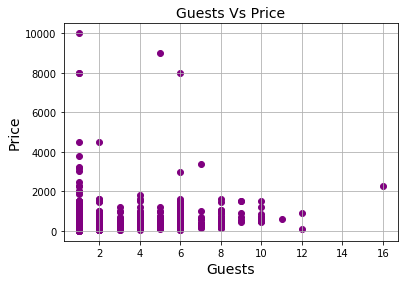

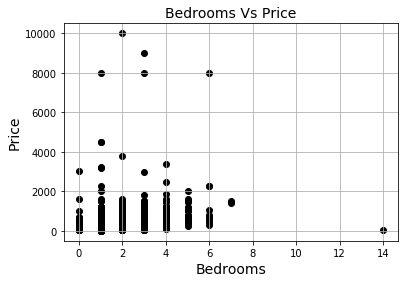

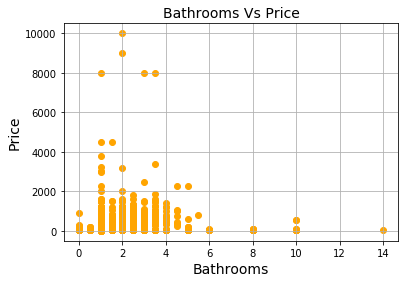

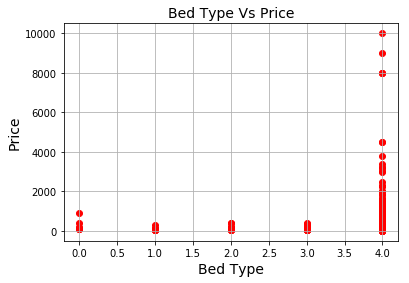

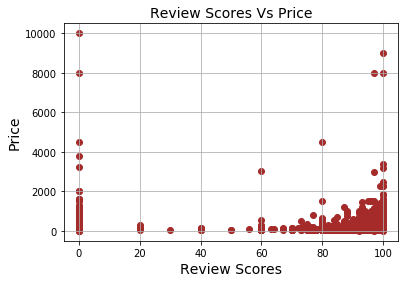

In [6]:
plt.scatter(df_ls['latitude'], df_ls['price'], color='blue')
plt.title('Latitude Vs Price', fontsize=14)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.grid(True)
plt.show()

plt.scatter(df_ls['longitude'], df_ls['price'], color='green')
plt.title('Longitude Vs Price', fontsize=14)
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.grid(True)
plt.show()

plt.scatter(df_ls['accommodates'], df_ls['price'], color='yellow')
plt.title('Accommodates Vs Price', fontsize=14)
plt.xlabel('Accommodates', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.grid(True)
plt.show()

plt.scatter(df_ls['guests_included'], df_ls['price'], color='purple')
plt.title('Guests Vs Price', fontsize=14)
plt.xlabel('Guests', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.grid(True)
plt.show()

plt.scatter(df_ls['bedrooms'], df_ls['price'], color='black')
plt.title('Bedrooms Vs Price', fontsize=14)
plt.xlabel('Bedrooms', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.grid(True)
plt.show()

plt.scatter(df_ls['bathrooms'], df_ls['price'], color='orange')
plt.title('Bathrooms Vs Price', fontsize=14)
plt.xlabel('Bathrooms', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.grid(True)
plt.show()

plt.scatter(df_ls['bed_type'], df_ls['price'], color='red')
plt.title('Bed Type Vs Price', fontsize=14)
plt.xlabel('Bed Type', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.grid(True)
plt.show()

plt.scatter(df_ls['review_scores_rating'], df_ls['price'], color='brown')
plt.title('Review Scores Vs Price', fontsize=14)
plt.xlabel('Review Scores', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.grid(True)
plt.show()

In [7]:
df_ls = df_ls.drop(['room_type', 'id', 'latitude', 'longitude'], 1)
df_ls.head(5)

,accommodates,guests_included,bedrooms,bathrooms,bed_type,review_scores_rating,price
0,3,2,1.0,1.0,4,97.0,170.0
1,5,2,2.0,1.0,4,98.0,235.0
2,2,1,1.0,4.0,4,85.0,65.0
3,2,1,1.0,4.0,4,93.0,65.0
4,5,2,2.0,1.5,4,97.0,785.0


In [8]:
df_ls.shape

(7151, 7)

In [9]:
from sklearn.model_selection import train_test_split

X = df_ls[['accommodates', 'guests_included', 'bedrooms', 'bathrooms', 'bed_type', 'review_scores_rating']]
y = df_ls['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33) # 70% training and 30% test

In [14]:
clf = RandomForestRegressor(n_estimators = 100, min_samples_leaf = 20, oob_score = True, n_jobs = -1)
clf.fit(X_train,y_train)
print('Training complete.')

Training complete.


In [15]:
y_pred=clf.predict(X_test)

from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(y_test, y_pred))
print(rmse)

249.05998231232437
